# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [3]:
# 1, i) Importar bibliotecas
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# 1, ii) Lendo o df
df = pd.read_csv('previsao_de_renda.csv')

In [4]:
# 1, iii) Deixando apenas as variáveis qualitativas no df
df_qualitativas = df.select_dtypes(['object', 'bool'])
variaveis_qualitativas = df_qualitativas.columns.drop('data_ref')
variaveis_qualitativas

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'mau'],
      dtype='object')

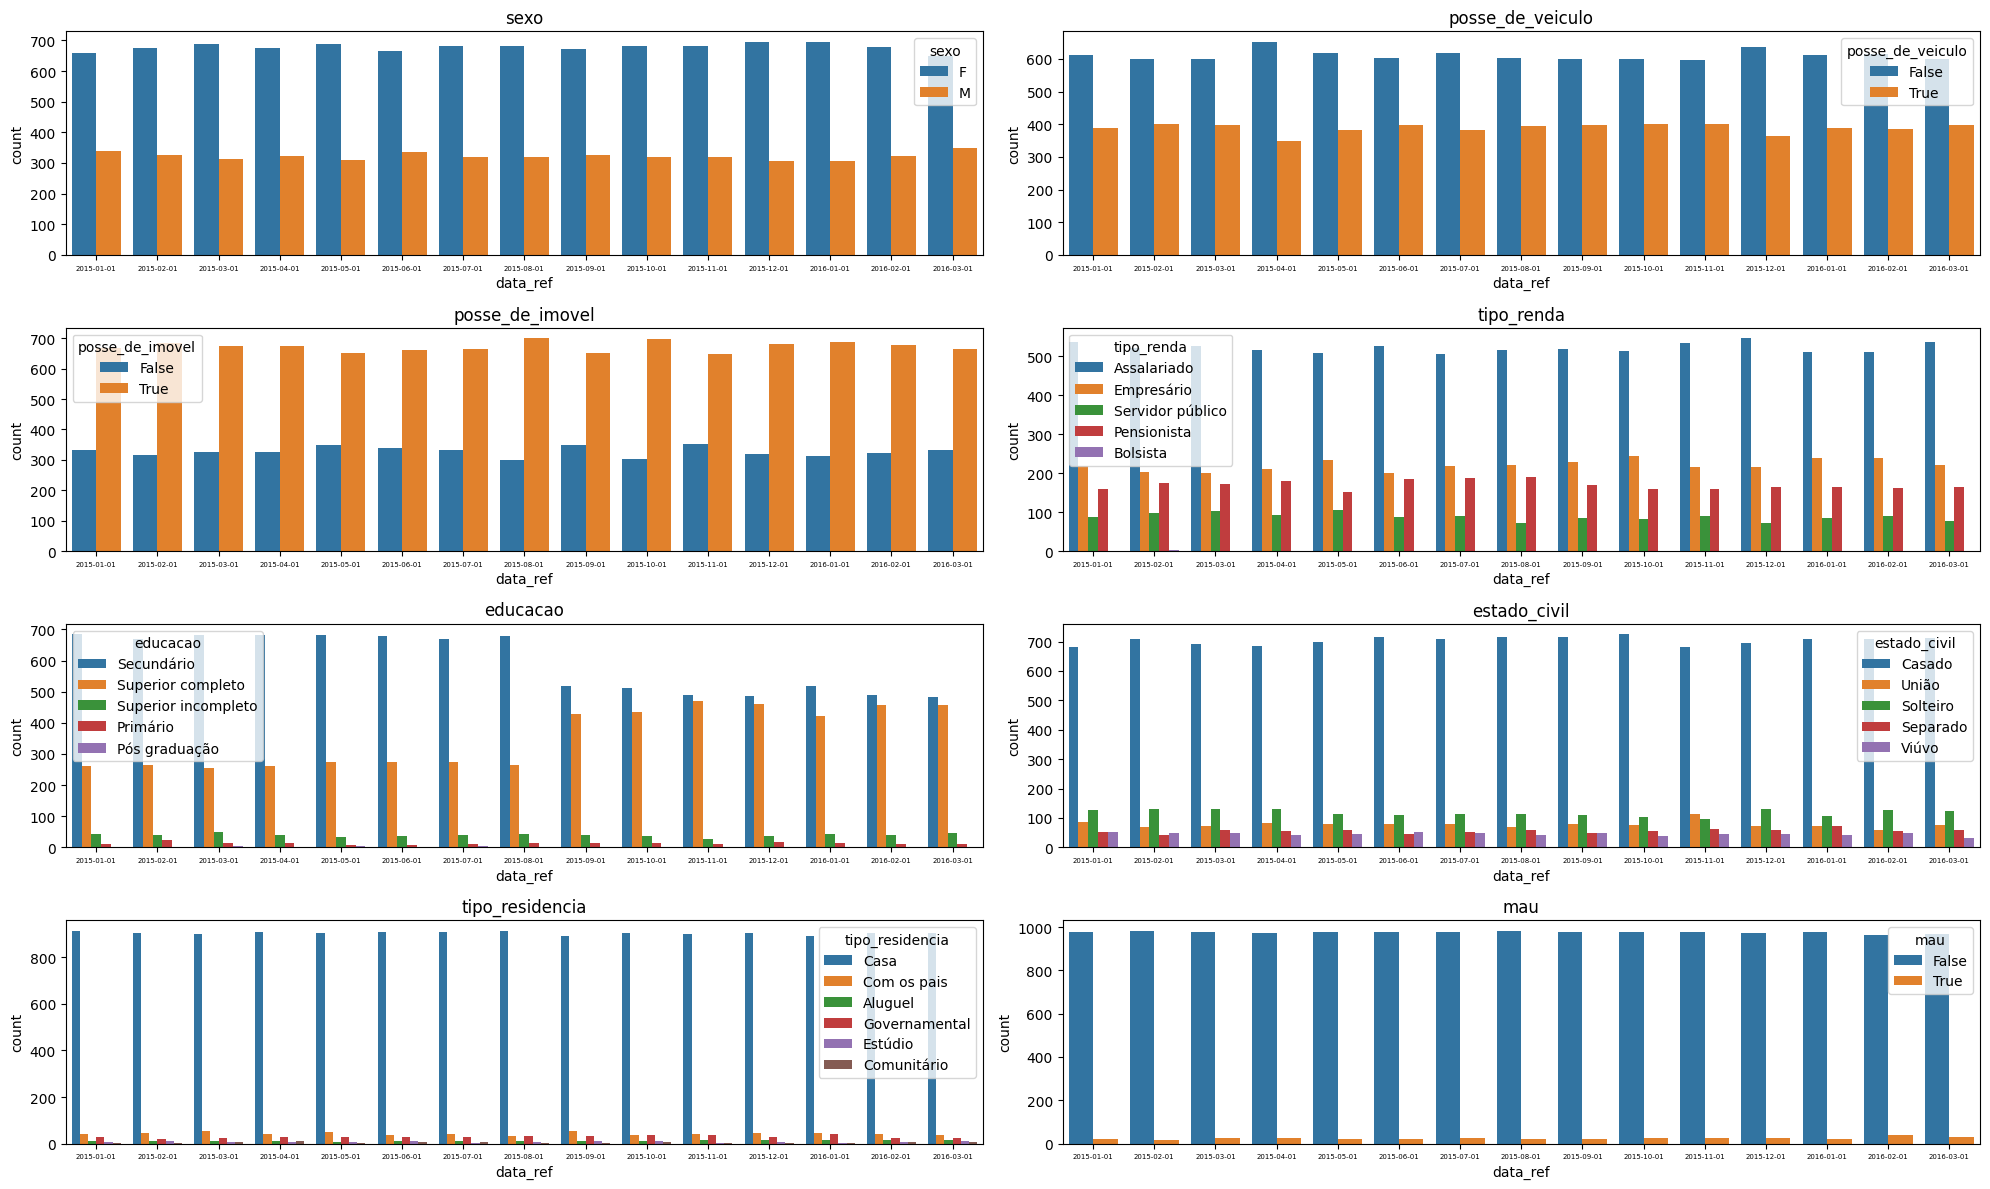

In [13]:
# 1, iv) Criar o gráfico
# Criar a grade de subplots 4x2
fig, axes = plt.subplots(4, 2, figsize=(20, 12))

# Preencher cada subplot com um countplot
for ax, var in zip(axes.flat, variaveis_qualitativas):
    sns.countplot(x='data_ref', hue=var, data=df_qualitativas, ax=ax)
    ax.tick_params(axis='x', labelsize=5)
    ax.set_title(var)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Observações
As variáveis categórias não parecem ter mudado muito, a maioria parecendo estar numa escala bem parecida mesmo ao longo do tempo, com talvez uma diferença para a variável `educacao`, em que os níveis de educação **Secundário** e **Superior completo** parecem ter mudado singelamente a partir de uma certa data.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

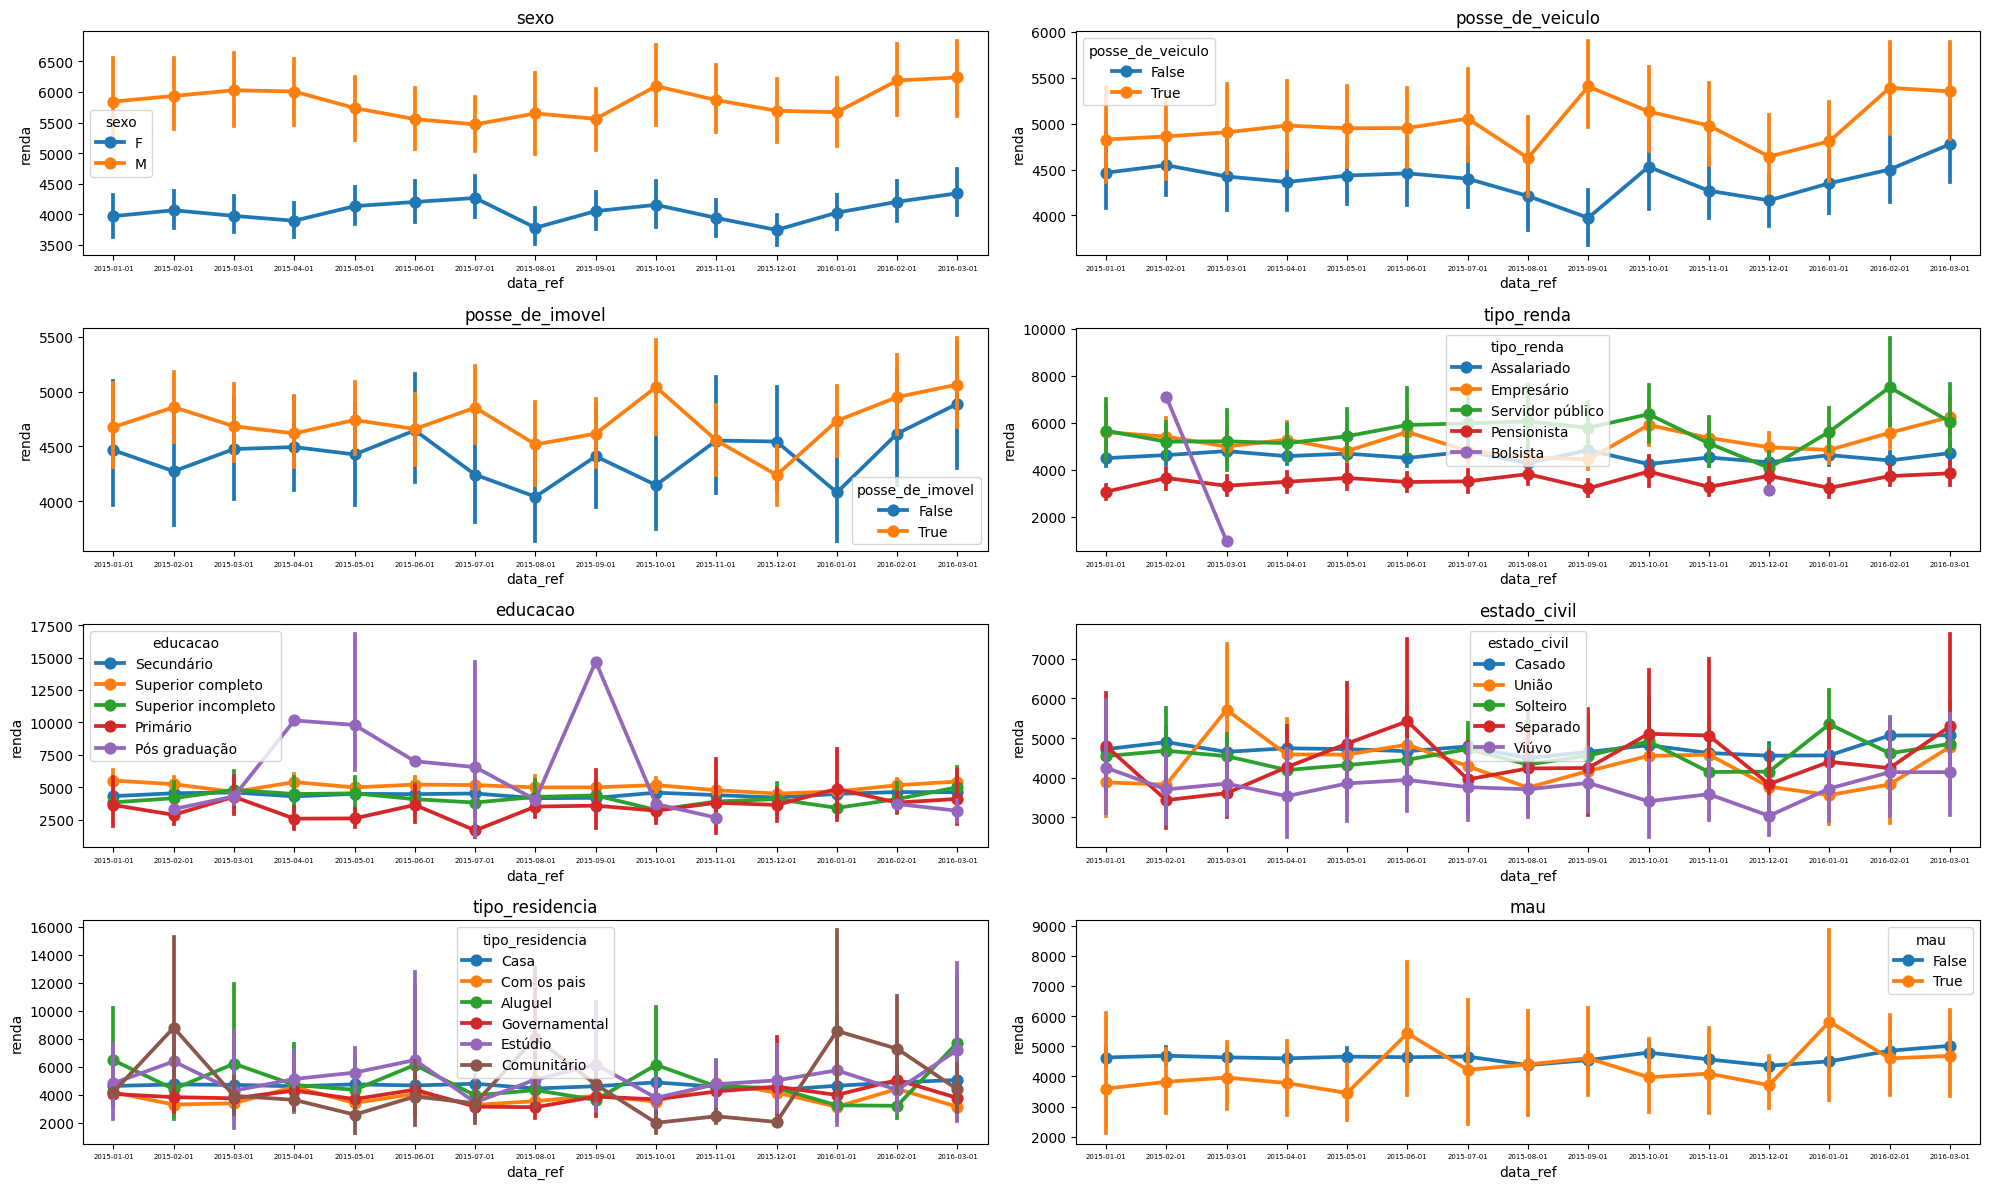

In [14]:
# 2, i) Criar o gráfico

fig, axes = plt.subplots(4, 2, figsize=(20,12))

for ax, var in zip(axes.flat, variaveis_qualitativas):
    sns.pointplot(data=df, x='data_ref', y='renda', hue=var, ax=ax)
    ax.tick_params(axis='x', labelsize=5)
    ax.set_title(var)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Observações
Como o gráfico apresenta quebras entre muitas variáveis distintas, fica meio difícil visualizar de forma clara padrões temporais. Seria interessante, nesse caso, analisar agrupamentos das variáveis categórias, ou analisar gráfico-a-gráfico de maneira mais sutil para se obter insights mais valiosos. Contudo, é possível observar alguns padrões, como por exemplo:

*   `educacao`, `tipo_renda`, `estado_civil`, `tipo_residencia` são variáveis **muito voláteis** e que parecem mudar constantemente com o tempo, sem seguir padrões específicos, especialmente para categorias específicas. Em educação, por exemplo, a renda dos pós-graduados varia com intensidade: por hora são os mais baixos, por vezes oas mais altos, com diferentes níveis de erro padrão.
*   As demais variáveis, como `sexo`, `mau`, e `posse_veiculo` e `posse_imovel`, variam menos, embora também tenham certos padrões úteis de serem observados.

No geral, para um modelo de aprendizado de máquina, eu investiria mais tempo analisando a estabilidade dessas variáveis, usando outros métodos para obter de forma mais clara insights mais úteis e mais relevantes.